In [1]:
import qiskit

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.17.4', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.14.0', 'qiskit-aqua': '0.9.2', 'qiskit': '0.27.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [3]:
from qiskit import IBMQ

In [4]:
IBMQ.save_account('6ad6e57717c8d8e47b73293738f7cb7c910c84ea5072c30f23cb2c8a3dd1d3f5918ff2dac2b7e543fd0126b6ab751a0982aff14d1a0444758730241e57e8f153')

configrc.store_credentials:WARNING:2021-07-18 18:28:14,895: Credentials already present. Set overwrite=True to overwrite.


In [5]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
from qiskit import *

In [7]:
qr = QuantumRegister(2)

In [8]:
cr = ClassicalRegister(2)

In [9]:
circuit = QuantumCircuit(qr,cr)

In [10]:
%matplotlib inline

In [11]:
circuit.draw(initial_state = True)

q0_0: |0>
         
q0_1: |0>
         
 c0: 0 2/

In [12]:
circuit.h(qr[0])

In [13]:
circuit.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════

In [14]:
print(circuit)

      ┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════
           


In [15]:
circuit.cx(qr[0], qr[1])

In [16]:
print(circuit)

      ┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0: 2/══════════
                


In [17]:
circuit.measure(qr, cr)

In [18]:
circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

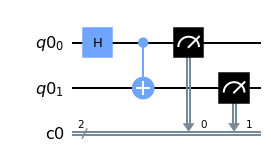

In [19]:
circuit.draw(output='mpl')

In [20]:
simulator = Aer.get_backend('qasm_simulator')

In [21]:
result = execute(circuit, backend = simulator).result()

In [22]:
from qiskit.tools.visualization import plot_histogram

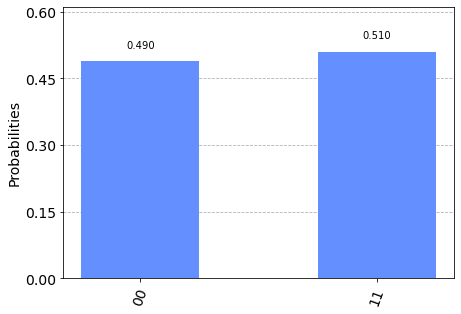

In [23]:
plot_histogram(result.get_counts(circuit))

In [24]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-07-18 18:28:22,891: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [25]:
provider = IBMQ.get_provider('ibm-q')

In [26]:
qcomp = provider.get_backend('ibmq_manila')

In [27]:
job =  execute(circuit, backend=qcomp)

In [28]:
from qiskit.tools.monitor import job_monitor

In [29]:
job_monitor(job)

Job Status: job has successfully run


In [30]:
result = job.result()

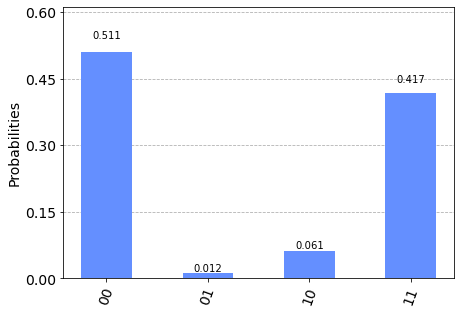

In [31]:
plot_histogram(result.get_counts(circuit))